<a href="https://colab.research.google.com/github/Generative-AI-in-Computer-Vision/generative-ai-in-computer-vision/blob/main/chapter-02/Ch02_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2: Autoencoder





## Step 1: Import Necessary Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

## Step 2: Prepare the Dataset

In [ ]:
batch_size = 32

# Transformations
transform = transforms.ToTensor()

# Download and load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15745208.54it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 488334.20it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1203531.89it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1867149.74it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Step 3: Implement the Autoencoder Model

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

## Step 4: Define the Loss Function and Optimizer

In [ ]:
model = Autoencoder() # Instantiate the model
criterion = nn.MSELoss() # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=1e-4) # Adam optimizer

## Step 5: Train the Autoencoder

In [ ]:
num_epochs = 30

for epoch in range(num_epochs):
    for data in train_loader:
        imgs, _ = data  # Load images and labels (labels not used)
        outputs = model(imgs)
        loss = criterion(outputs, imgs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/30], Loss: 0.0610
Epoch [2/30], Loss: 0.0207
Epoch [3/30], Loss: 0.0125
Epoch [4/30], Loss: 0.0094
Epoch [5/30], Loss: 0.0084
Epoch [6/30], Loss: 0.0059
Epoch [7/30], Loss: 0.0044
Epoch [8/30], Loss: 0.0040
Epoch [9/30], Loss: 0.0039
Epoch [10/30], Loss: 0.0044
Epoch [11/30], Loss: 0.0034
Epoch [12/30], Loss: 0.0040
Epoch [13/30], Loss: 0.0033
Epoch [14/30], Loss: 0.0032
Epoch [15/30], Loss: 0.0032
Epoch [16/30], Loss: 0.0030
Epoch [17/30], Loss: 0.0031
Epoch [18/30], Loss: 0.0027
Epoch [19/30], Loss: 0.0026
Epoch [20/30], Loss: 0.0028
Epoch [21/30], Loss: 0.0030
Epoch [22/30], Loss: 0.0021
Epoch [23/30], Loss: 0.0024
Epoch [24/30], Loss: 0.0021
Epoch [25/30], Loss: 0.0025
Epoch [26/30], Loss: 0.0024
Epoch [27/30], Loss: 0.0025
Epoch [28/30], Loss: 0.0027
Epoch [29/30], Loss: 0.0019
Epoch [30/30], Loss: 0.0024


## Step 6: Model Evaluation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

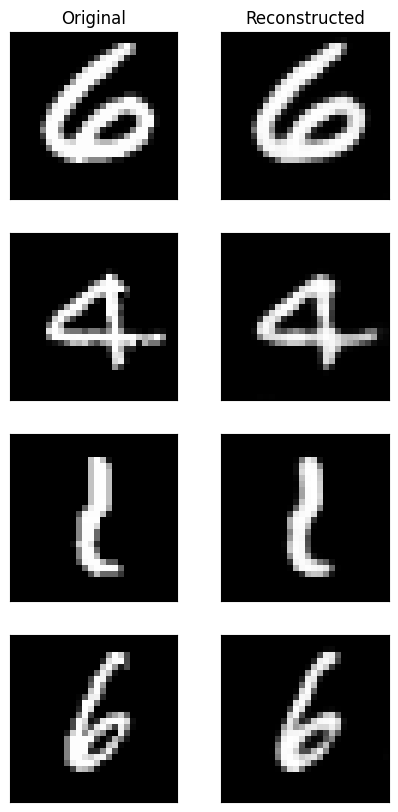

In [ ]:
# Obtain one batch of test images
dataiter = iter(train_loader)
images, _ = next(dataiter)

# Get sample outputs
output = model(images)
images = images.numpy()

output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()

# Number of images to display
num_images = 4

# Plot the original and reconstructed images
fig, axes = plt.subplots(nrows=num_images, ncols=2, figsize=(5, 10))

for i in range(num_images):
    # Original images in the first column
    ax = axes[i, 0]
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original')

    # Reconstructed images in the second column
    ax = axes[i, 1]
    ax.imshow(np.squeeze(output[i]), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Reconstructed')

plt.show()



---

